In [1]:
from google.colab import drive

drive.mount("/content/drive")
!ls "/content/drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
'My Drive'


In [0]:
import pandas as pd

# Import facial emotion recognition dataset.
data = pd.read_csv("/content/drive/My Drive/fer2013.csv")


In [0]:
# Number of samples in the dataset.
len(data)

35887

In [0]:
from keras.preprocessing import image
import numpy as np

# Convert pixels to floats. 
data['pixels'] = data['pixels'].apply(lambda m : np.asarray(m.split(' '), dtype = 'float32'))

Using TensorFlow backend.


In [0]:
# Split into training and test sets. 
train = data.loc[data['Usage'] == 'Training']
test = data.loc[data['Usage'] != 'Training']

In [0]:
from sklearn.model_selection import train_test_split

# Convert pixel arrays to 48x48 matrices and format to be fed into CNNs. 
X_train_set = train['pixels']

X_train_vals = []
for x in X_train_set:
    x = np.asarray(x).reshape(48, 48)
    X_train_vals.append(x)
    
    
X_train_vals = np.asarray(X_train_vals)
X_train_vals = np.expand_dims(X_train_vals, -1)  
y_train_vals = pd.get_dummies(train['emotion']).as_matrix()
    
X_train, X_val, y_train, y_val = train_test_split(X_train_vals, y_train_vals, test_size=0.10, random_state=1357)



In [0]:
y_val.shape

(2871, 7)

In [0]:
# Convert pixel arrays to 48x48 matrices and format to be fed into CNNs. 
X_test_set = test['pixels']

X_test = []
for x in X_test_set:
    x = np.asarray(x).reshape(48, 48)
    X_test.append(x)
    
X_test = np.asarray(X_test)
X_test = np.expand_dims(X_test, -1) 

y_test = pd.get_dummies(test['emotion']).as_matrix()

In [0]:
y_test.shape

(7178, 7)

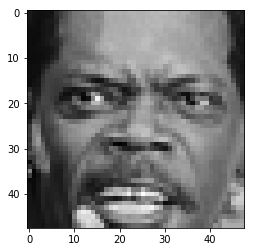

In [0]:
import matplotlib.pyplot as plt

# Example of image from dataset. 
plt.imshow(data['pixels'].iloc[10].reshape((48, 48)) , cmap = 'gist_gray')
plt.show()

Showing frequency of each class in the dataset. The dataset seems to include the most samples of the happy emotion and the least of disgust. <br>
Emotions: <br>
0. Anger <br>
1. Disgust <br>
2. Fear <br>
3. Happy <br>
4. Sad <br>
5. Surprise <br>
6. Neutral <br>

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


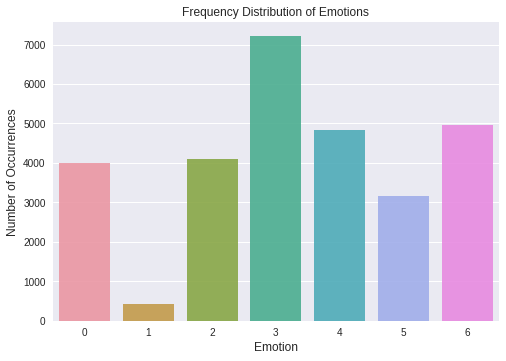

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Emotions:
1. 
count = train['emotion'].value_counts()

sns.set(style="darkgrid")
sns.barplot(count.index, count.values, alpha=0.9)
plt.title('Frequency Distribution of Emotions')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel("Emotion", fontsize=12)
plt.xticks(rotation=0)
plt.show()


In [0]:
# Counts of each emotion class. 
data['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [5]:
print("Anger", 4953 / len(data))
print("Disgust", 547 / len(data))
print("Fear", 5121 / len(data))
print("Happy", 8989 / len(data))
print("Sad", 6077 / len(data))
print("Surprise", 4002 / len(data))
print("Neutral", 6198 / len(data))

Anger 0.13801655195474685
Disgust 0.01524228829381113
Fear 0.14269791289324826
Happy 0.25048067545350683
Sad 0.1693370858528158
Surprise 0.11151670521358709
Neutral 0.17270878033828405


**Implementation of VGG11 and VGG16 architectures. The achitecture experiments with building networks of increasing depth for image recognition. The models are able to increase their depth due to the use of a small filter. The architecture adds layers and uses a (3x3) filter in each convolution layer. **

# VGG Implementations

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def vgg(m, dropout, more_drop):
  model = Sequential()
  
  if (m == "vgg11"):
    # Convolution Block 1
    model.add(Conv2D(64, (3,3), input_shape=(48,48,1), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    if (dropout):
      model.add(Dropout(0.5))
  
      
    # Convolution Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    if (more_drop):
      model.add(Dropout(0.5))
             
    # Conv Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    if (dropout):
      model.add(Dropout(0.5))
    # Conv Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    if (more_drop):
      model.add(Dropout(0.5))

                
    # Conv Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    if (dropout):
      model.add(Dropout(0.5))

    # FC layers
    model.add(Flatten())
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(7, activation='softmax'))
 
                
  if (m == "vgg16"):
    # Convolution Block 1
    model.add(Conv2D(64, (3,3), input_shape=(48,48,1), activation='relu', padding='same'))
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    if (dropout):
      model.add(Dropout(0.5))
                
    # Convolution Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    if (more_drop):
      model.add(Dropout(0.5))
                
               
    # Conv Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    if (dropout):
      model.add(Dropout(0.5))
                
    # Conv Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    if (more_drop):
      model.add(Dropout(0.5))
                
    # Conv Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    if (dropout):
      model.add(Dropout(0.5))

    # FC layers
    model.add(Flatten())
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    
  return model


# Vanilla VGG11

**VGG11 model with batch size of 32.**

In [0]:
vgg11_32 = vgg("vgg11", False, False)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
vgg11_32.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 256)       590080    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 256)         0         
__________

In [0]:
vgg11_32.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history_11_32 = vgg11_32.fit(X_train, y_train, batch_size=32, epochs=35, validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 25838 samples, validate on 2871 samples
Epoch 1/35
25838/25838 [==============================] - 52s 2ms/step - loss: 1.7735 - acc: 0.2752 - val_loss: 1.6360 - val_acc: 0.3595
Epoch 2/35
25838/25838 [==============================] - 45s 2ms/step - loss: 1.5715 - acc: 0.3936 - val_loss: 1.4818 - val_acc: 0.4364
Epoch 3/35
25838/25838 [==============================] - 45s 2ms/step - loss: 1.4248 - acc: 0.4538 - val_loss: 1.4104 - val_acc: 0.4504
Epoch 4/35
25838/25838 [==============================] - 45s 2ms/step - loss: 1.2966 - acc: 0.5096 - val_loss: 1.2967 - val_acc: 0.5082
Epoch 5/35
25838/25838 [==============================] - 45s 2ms/step - loss: 1.1946 - acc: 0.5501 - val_loss: 1.3843 - val_acc: 0.4500
Epoch 6/35
25838/25838 [==============================] - 45s 2ms/step - loss: 1.1074 - acc: 0.5863 - val_loss: 1.3752 - val_acc: 0.5200
Epoch 7/35
25838/25838 [==============================] - 45s 2ms/step - loss: 1.

In [0]:
vgg11_32.evaluate(X_test, y_test)

7178/7178 [==============================] - 4s 504us/step


[3.104441334524338, 0.5835887433991654]

**Confusion matrix for VGG11 with batch size of 32.**

In [0]:
from sklearn.metrics import confusion_matrix

vgg11_32_preds = vgg11_32.predict(X_test)
confusion_matrix(y_test.argmax(axis=1), vgg11_32_preds.argmax(axis=1))

array([[ 453,   12,  123,   74,  158,   26,  112],
       [  24,   59,    6,    9,    5,    2,    6],
       [ 125,    3,  436,   68,  179,   67,  146],
       [  76,    2,   53, 1397,   91,   44,  111],
       [ 162,    4,  149,  120,  555,   13,  244],
       [  29,    3,   77,   36,   25,  611,   50],
       [ 106,    4,   77,  126,  227,   15,  678]])

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), vgg11_32_preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.46      0.47      0.47       958
           1       0.68      0.53      0.60       111
           2       0.47      0.43      0.45      1024
           3       0.76      0.79      0.78      1774
           4       0.45      0.45      0.45      1247
           5       0.79      0.74      0.76       831
           6       0.50      0.55      0.53      1233

   micro avg       0.58      0.58      0.58      7178
   macro avg       0.59      0.56      0.57      7178
weighted avg       0.58      0.58      0.58      7178



**VGG11 model with batch size of 64.**

In [0]:
vgg11_64 = vgg("vgg11", False, False)

In [0]:
vgg11_64.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history_11_64 = vgg11_64.fit(X_train, y_train, batch_size=64, epochs=35, validation_data=(X_val, y_val))

Train on 25838 samples, validate on 2871 samples
Epoch 1/35
25838/25838 [==============================] - 34s 1ms/step - loss: 1.7730 - acc: 0.2785 - val_loss: 1.9432 - val_acc: 0.1738
Epoch 2/35
25838/25838 [==============================] - 32s 1ms/step - loss: 1.6096 - acc: 0.3753 - val_loss: 1.5731 - val_acc: 0.3932
Epoch 3/35
25838/25838 [==============================] - 32s 1ms/step - loss: 1.4945 - acc: 0.4263 - val_loss: 1.5243 - val_acc: 0.4131
Epoch 4/35
25838/25838 [==============================] - 32s 1ms/step - loss: 1.4049 - acc: 0.4613 - val_loss: 1.3925 - val_acc: 0.4594
Epoch 5/35
25838/25838 [==============================] - 32s 1ms/step - loss: 1.3120 - acc: 0.5003 - val_loss: 1.3734 - val_acc: 0.4664
Epoch 6/35
25838/25838 [==============================] - 32s 1ms/step - loss: 1.2266 - acc: 0.5363 - val_loss: 1.2977 - val_acc: 0.5148
Epoch 7/35
25838/25838 [==============================] - 32s 1ms/step - loss: 1.1437 - acc: 0.5709 - val_loss: 1.2778 - val_acc:

In [0]:
vgg11_64.evaluate(X_test, y_test)

7178/7178 [==============================] - 3s 481us/step


[2.7666652867574153, 0.5894399554359444]

**Confusion matrix for VGG11 with batch size of 64.**

In [0]:
from sklearn.metrics import confusion_matrix

vgg11_64_preds = vgg11_64.predict(X_test)
confusion_matrix(y_test.argmax(axis=1), vgg11_64_preds.argmax(axis=1))

array([[ 494,    9,   95,   66,  178,   22,   94],
       [  25,   51,    8,   12,    7,    0,    8],
       [ 124,    2,  405,   71,  215,   84,  123],
       [  74,    1,   40, 1416,  108,   30,  105],
       [ 156,    2,  137,  104,  610,   19,  219],
       [  26,    2,   76,   43,   36,  602,   46],
       [ 135,    2,   73,  121,  229,   20,  653]])

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), vgg11_64_preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.48      0.52      0.50       958
           1       0.74      0.46      0.57       111
           2       0.49      0.40      0.44      1024
           3       0.77      0.80      0.79      1774
           4       0.44      0.49      0.46      1247
           5       0.77      0.72      0.75       831
           6       0.52      0.53      0.53      1233

   micro avg       0.59      0.59      0.59      7178
   macro avg       0.60      0.56      0.57      7178
weighted avg       0.59      0.59      0.59      7178



**VGG11 model with batch size of 128.**

In [0]:
vgg11_128 = vgg("vgg11", False, False)

In [0]:
vgg11_128.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history_11_128 = vgg11_128.fit(X_train, y_train, batch_size=128, epochs=35, validation_data=(X_val, y_val))

Train on 25838 samples, validate on 2871 samples
Epoch 1/35
25838/25838 [==============================] - 29s 1ms/step - loss: 1.8159 - acc: 0.2513 - val_loss: 1.7874 - val_acc: 0.2654
Epoch 2/35
25838/25838 [==============================] - 25s 955us/step - loss: 1.7459 - acc: 0.2963 - val_loss: 1.7234 - val_acc: 0.2849
Epoch 3/35
25838/25838 [==============================] - 25s 955us/step - loss: 1.6468 - acc: 0.3561 - val_loss: 1.5903 - val_acc: 0.3793
Epoch 4/35
25838/25838 [==============================] - 25s 956us/step - loss: 1.5697 - acc: 0.3938 - val_loss: 1.6483 - val_acc: 0.3490
Epoch 5/35
25838/25838 [==============================] - 25s 958us/step - loss: 1.5036 - acc: 0.4250 - val_loss: 1.5104 - val_acc: 0.4169
Epoch 6/35
25838/25838 [==============================] - 25s 956us/step - loss: 1.4416 - acc: 0.4506 - val_loss: 1.5920 - val_acc: 0.4183
Epoch 7/35
25838/25838 [==============================] - 25s 957us/step - loss: 1.3851 - acc: 0.4752 - val_loss: 1.371

In [0]:
vgg11_128.evaluate(X_test, y_test)

7178/7178 [==============================] - 3s 481us/step


[2.7024751506033766, 0.5679855112927842]

**Confusion matrix and classification report for VGG11 with batch size of 128.**

In [0]:
from sklearn.metrics import confusion_matrix

vgg11_128_preds = vgg11_128.predict(X_test)
confusion_matrix(y_test.argmax(axis=1), vgg11_128_preds.argmax(axis=1))

array([[ 502,   10,   95,   75,  153,   26,   97],
       [  25,   54,   12,    7,    8,    0,    5],
       [ 134,    3,  396,   78,  199,   82,  132],
       [  95,    2,   49, 1372,   92,   31,  133],
       [ 181,    6,  155,  111,  530,   27,  237],
       [  37,    0,   85,   42,   30,  595,   42],
       [ 143,    6,   98,  131,  204,   23,  628]])

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), vgg11_128_preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.45      0.52      0.48       958
           1       0.67      0.49      0.56       111
           2       0.44      0.39      0.41      1024
           3       0.76      0.77      0.76      1774
           4       0.44      0.43      0.43      1247
           5       0.76      0.72      0.74       831
           6       0.49      0.51      0.50      1233

   micro avg       0.57      0.57      0.57      7178
   macro avg       0.57      0.55      0.56      7178
weighted avg       0.57      0.57      0.57      7178



In [0]:
import matplotlib.pyplot as plt

def plot(models, labels, feature):
  if (feature == "loss"):
    for i, model in enumerate(models):
      loss_values = model.history['loss']
      epochs = range(1, len(loss_values)+1)

      plt.plot(epochs, loss_values, label=labels[i])
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.legend()

    plt.show()
    
  if (feature == "accuracy"):
    for i, model in enumerate(models):
      loss_values = model.history['val_acc']
      epochs = range(1, len(loss_values)+1)

      plt.plot(epochs, loss_values, label=labels[i])
      plt.xlabel('Epochs')
      plt.ylabel('Accuracy')
      plt.legend()

    plt.show()


# Loss and Accuracy Plots for VGG11 Models

In [0]:
model_11_histories = [history_11_32, history_11_64, history_11_128]
labels = ["Batch 32", "Batch 64", "Batch 128"]
#model_16_histories = [vgg_16_32, vgg_16_64, vgg_16_128]

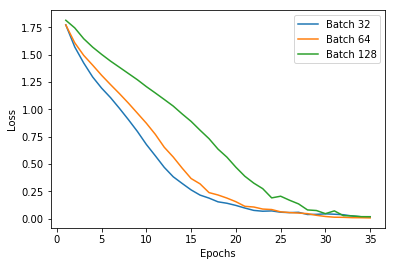

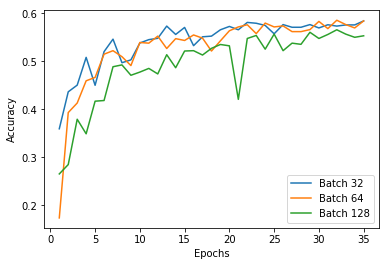

In [0]:
plot(model_11_histories, labels, "loss")
plot(model_11_histories, labels, "accuracy")

In [0]:
!pip install -U -q PyDrive

    100% |████████████████████████████████| 993kB 18.5MB/s 


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()            
drive = GoogleDrive(gauth)

In [0]:
# Save keras model.
vgg11_32.save('vgg11_32.h5')
model_file = drive.CreateFile({'VGG11_32' : 'vgg11_32.h5'})                       
model_file.SetContentFile('vgg11_32.h5')                       
model_file.Upload()

In [0]:
# Save keras model.
vgg11_64.save('vgg11_64.h5')
model_file = drive.CreateFile({'VGG11_64' : 'vgg11_64.h5'})                       
model_file.SetContentFile('vgg11_64.h5')                       
model_file.Upload()

In [0]:
# Save keras model.
vgg11_128.save('vgg11_128.h5')
model_file = drive.CreateFile({'VGG11_128' : 'vgg11_128.h5'})                       
model_file.SetContentFile('vgg11_128.h5')                       
model_file.Upload()

# Vanilla VGG16

**VGG16 model with batch size of 32.**

In [0]:
vgg16_32 = vgg('vgg16', False, False)

In [0]:
vgg16_32.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 256)       295168    
__________

In [0]:
vgg16_32.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history_16_32 = vgg16_32.fit(X_train, y_train, batch_size=32, epochs=35, validation_data=(X_val, y_val))

Train on 25838 samples, validate on 2871 samples
Epoch 1/35
25838/25838 [==============================] - 76s 3ms/step - loss: 1.7992 - acc: 0.2615 - val_loss: 1.7542 - val_acc: 0.2734
Epoch 2/35
25838/25838 [==============================] - 75s 3ms/step - loss: 1.6260 - acc: 0.3665 - val_loss: 1.5729 - val_acc: 0.3887
Epoch 3/35
25838/25838 [==============================] - 75s 3ms/step - loss: 1.4802 - acc: 0.4284 - val_loss: 1.4488 - val_acc: 0.4336
Epoch 4/35
25838/25838 [==============================] - 75s 3ms/step - loss: 1.3746 - acc: 0.4723 - val_loss: 1.3890 - val_acc: 0.4678
Epoch 5/35
25838/25838 [==============================] - 75s 3ms/step - loss: 1.2779 - acc: 0.5147 - val_loss: 1.3076 - val_acc: 0.5002
Epoch 6/35
25838/25838 [==============================] - 75s 3ms/step - loss: 1.1888 - acc: 0.5525 - val_loss: 1.2609 - val_acc: 0.5319
Epoch 7/35
25838/25838 [==============================] - 75s 3ms/step - loss: 1.1045 - acc: 0.5854 - val_loss: 1.2505 - val_acc:

In [0]:
vgg16_32.evaluate(X_test, y_test)

7178/7178 [==============================] - 6s 836us/step


[2.653868699146865, 0.5778768459263868]

***Confusion matrix for VGG16 model with batch size of 32.***

In [0]:
from sklearn.metrics import confusion_matrix

vgg16_32_preds = vgg16_32.predict(X_test)
confusion_matrix(y_test.argmax(axis=1), vgg16_32_preds.argmax(axis=1))

array([[ 501,   16,   85,   67,  135,   20,  134],
       [  27,   59,    6,    4,    9,    0,    6],
       [ 126,    9,  351,   73,  230,   83,  152],
       [  80,    4,   50, 1383,  103,   38,  116],
       [ 155,    6,  134,  104,  579,   20,  249],
       [  33,    6,   60,   51,   30,  598,   53],
       [ 121,    7,   74,   97,  234,   23,  677]])

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), vgg16_32_preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.48      0.52      0.50       958
           1       0.55      0.53      0.54       111
           2       0.46      0.34      0.39      1024
           3       0.78      0.78      0.78      1774
           4       0.44      0.46      0.45      1247
           5       0.76      0.72      0.74       831
           6       0.49      0.55      0.52      1233

   micro avg       0.58      0.58      0.58      7178
   macro avg       0.57      0.56      0.56      7178
weighted avg       0.58      0.58      0.58      7178



**VGG16 model with batch size of 64.**

In [0]:
vgg16_64 = vgg('vgg16', False, False)

In [0]:
vgg16_64.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history_16_64 = vgg16_64.fit(X_train, y_train, batch_size=64, epochs=35, validation_data=(X_val, y_val))

Train on 25838 samples, validate on 2871 samples
Epoch 1/35
25838/25838 [==============================] - 57s 2ms/step - loss: 1.8036 - acc: 0.2579 - val_loss: 1.7688 - val_acc: 0.2672
Epoch 2/35
25838/25838 [==============================] - 56s 2ms/step - loss: 1.7153 - acc: 0.3161 - val_loss: 1.6959 - val_acc: 0.3149
Epoch 3/35
25838/25838 [==============================] - 56s 2ms/step - loss: 1.6067 - acc: 0.3736 - val_loss: 1.5837 - val_acc: 0.3870
Epoch 4/35
25838/25838 [==============================] - 56s 2ms/step - loss: 1.5202 - acc: 0.4143 - val_loss: 1.5142 - val_acc: 0.3981
Epoch 5/35
25838/25838 [==============================] - 56s 2ms/step - loss: 1.4537 - acc: 0.4424 - val_loss: 1.4392 - val_acc: 0.4525
Epoch 6/35
25838/25838 [==============================] - 56s 2ms/step - loss: 1.3970 - acc: 0.4635 - val_loss: 1.4925 - val_acc: 0.4350
Epoch 7/35
25838/25838 [==============================] - 56s 2ms/step - loss: 1.3323 - acc: 0.4923 - val_loss: 1.4350 - val_acc:

In [0]:
vgg16_64.evaluate(X_test, y_test)

7178/7178 [==============================] - 6s 836us/step


[3.248024438077874, 0.5560044580995289]

**Confusion matrix for VGG16 model with batch size of 64.**

In [0]:
from sklearn.metrics import confusion_matrix

vgg16_64_preds = vgg16_64.predict(X_test)
confusion_matrix(y_test.argmax(axis=1), vgg16_64_preds.argmax(axis=1))

array([[ 378,   17,   80,  186,  159,   33,  105],
       [  19,   61,    6,    9,    8,    0,    8],
       [  93,   10,  371,  171,  171,   90,  118],
       [  41,    3,   35, 1522,   73,   26,   74],
       [ 121,    4,  130,  261,  530,   29,  172],
       [  22,    2,   54,   99,   37,  576,   41],
       [  93,    2,  104,  253,  195,   33,  553]])

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), vgg16_64_preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.49      0.39      0.44       958
           1       0.62      0.55      0.58       111
           2       0.48      0.36      0.41      1024
           3       0.61      0.86      0.71      1774
           4       0.45      0.43      0.44      1247
           5       0.73      0.69      0.71       831
           6       0.52      0.45      0.48      1233

   micro avg       0.56      0.56      0.56      7178
   macro avg       0.56      0.53      0.54      7178
weighted avg       0.55      0.56      0.54      7178



**VGG16 model with batch size of 128.**

In [0]:
vgg16_128 = vgg('vgg16', False, False)

In [0]:
vgg16_128.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history_16_128 = vgg16_128.fit(X_train, y_train, batch_size=128, epochs=35, validation_data=(X_val, y_val))

Train on 25838 samples, validate on 2871 samples
Epoch 1/35
25838/25838 [==============================] - 47s 2ms/step - loss: 1.8120 - acc: 0.2495 - val_loss: 1.8021 - val_acc: 0.2574
Epoch 2/35
25838/25838 [==============================] - 45s 2ms/step - loss: 1.7702 - acc: 0.2789 - val_loss: 1.7152 - val_acc: 0.3184
Epoch 3/35
25838/25838 [==============================] - 45s 2ms/step - loss: 1.6978 - acc: 0.3304 - val_loss: 1.6352 - val_acc: 0.3720
Epoch 4/35
25838/25838 [==============================] - 45s 2ms/step - loss: 1.6181 - acc: 0.3708 - val_loss: 1.5579 - val_acc: 0.4030
Epoch 5/35
25838/25838 [==============================] - 45s 2ms/step - loss: 1.5529 - acc: 0.4008 - val_loss: 1.5160 - val_acc: 0.4201
Epoch 6/35
25838/25838 [==============================] - 45s 2ms/step - loss: 1.4996 - acc: 0.4243 - val_loss: 1.4672 - val_acc: 0.4441
Epoch 7/35
25838/25838 [==============================] - 45s 2ms/step - loss: 1.4534 - acc: 0.4423 - val_loss: 1.5051 - val_acc:

In [0]:
vgg16_128.evaluate(X_test, y_test)

7178/7178 [==============================] - 6s 837us/step


[2.8384924290338973, 0.5468096963274476]

**Confusion matrix for VGG16 model with batch size of 64.**

In [0]:
from sklearn.metrics import confusion_matrix

vgg16_128_preds = vgg16_128.predict(X_test)
confusion_matrix(y_test.argmax(axis=1), vgg16_128_preds.argmax(axis=1))

array([[ 439,    8,  100,  117,  177,   30,   87],
       [  23,   49,   12,    6,   11,    0,   10],
       [ 118,    4,  380,   99,  217,   85,  121],
       [  75,    2,   49, 1380,  131,   48,   89],
       [ 151,    4,  128,  169,  566,   41,  188],
       [  48,    2,   65,   56,   41,  577,   42],
       [ 122,    4,   72,  188,  277,   36,  534]])

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), vgg16_128_preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.45      0.46      0.45       958
           1       0.67      0.44      0.53       111
           2       0.47      0.37      0.42      1024
           3       0.68      0.78      0.73      1774
           4       0.40      0.45      0.42      1247
           5       0.71      0.69      0.70       831
           6       0.50      0.43      0.46      1233

   micro avg       0.55      0.55      0.55      7178
   macro avg       0.55      0.52      0.53      7178
weighted avg       0.54      0.55      0.54      7178



# Loss and Accuracy Plots for VGG16 Models

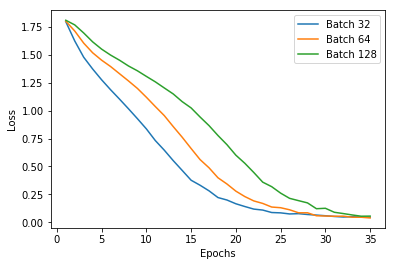

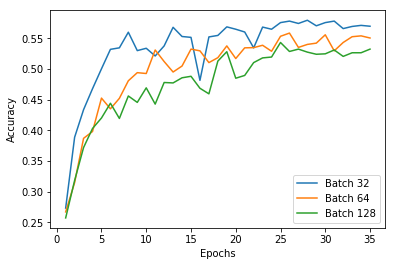

In [0]:
model_16_histories = [history_16_32, history_16_64, history_16_128]
plot(model_16_histories, labels, "loss")
plot(model_16_histories, labels, "accuracy")

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()            
drive = GoogleDrive(gauth)

In [0]:
# Save keras model.
vgg16_32.save('vgg16_32.h5')
model_file = drive.CreateFile({'VGG16_32' : 'vgg16_32.h5'})                       
model_file.SetContentFile('vgg16_32.h5')                       
model_file.Upload()

In [0]:
# Save keras model.
vgg16_64.save('vgg16_64.h5')
model_file = drive.CreateFile({'VGG16_64' : 'vgg16_64.h5'})                       
model_file.SetContentFile('vgg16_64.h5')                       
model_file.Upload()

In [0]:
# Save keras model.
vgg16_128.save('vgg16_128.h5')
model_file = drive.CreateFile({'VGG16_128' : 'vgg16_128.h5'})                       
model_file.SetContentFile('vgg16_128.h5')                       
model_file.Upload()

# VGG with Dropout After Each Block

In [0]:
vgg11_64_more_drop = vgg('vgg11', True, True)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
vgg11_64_more_drop.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history_11_64_more_drop = vgg11_64_more_drop.fit(X_train, y_train, batch_size=64, epochs=35, validation_data=(X_val, y_val))

Train on 25838 samples, validate on 2871 samples
Epoch 1/35
25838/25838 [==============================] - 35s 1ms/step - loss: 2.0091 - acc: 0.2290 - val_loss: 1.8739 - val_acc: 0.2400
Epoch 2/35
25838/25838 [==============================] - 34s 1ms/step - loss: 1.8173 - acc: 0.2526 - val_loss: 1.8636 - val_acc: 0.2400
Epoch 3/35
25838/25838 [==============================] - 34s 1ms/step - loss: 1.8152 - acc: 0.2524 - val_loss: 1.8525 - val_acc: 0.2400
Epoch 4/35
25838/25838 [==============================] - 34s 1ms/step - loss: 1.8115 - acc: 0.2530 - val_loss: 1.8458 - val_acc: 0.2400
Epoch 5/35
25838/25838 [==============================] - 34s 1ms/step - loss: 1.8091 - acc: 0.2527 - val_loss: 1.8444 - val_acc: 0.2400
Epoch 6/35
25838/25838 [==============================] - 34s 1ms/step - loss: 1.8082 - acc: 0.2532 - val_loss: 1.8407 - val_acc: 0.2400
Epoch 7/35
25838/25838 [==============================] - 34s 1ms/step - loss: 1.8056 - acc: 0.2530 - val_loss: 1.8361 - val_acc:

In [0]:
vgg11_64_more_drop.evaluate(X_test, y_test)

7178/7178 [==============================] - 4s 496us/step


[1.5582064397821986, 0.38074672612415844]

In [0]:
from sklearn.metrics import confusion_matrix

vgg11_64_preds_all_drop = vgg11_64_more_drop.predict(X_test)
confusion_matrix(y_test.argmax(axis=1), vgg11_64_preds_all_drop.argmax(axis=1))

array([[   8,    0,    4,  507,  336,    7,   96],
       [   1,    0,    0,   64,   39,    0,    7],
       [   6,    0,   10,  536,  329,   34,  109],
       [   2,    0,    1, 1671,   74,    3,   23],
       [   1,    0,    1,  650,  469,    1,  125],
       [  15,    0,   39,  252,  151,  285,   89],
       [   1,    0,    2,  550,  388,    2,  290]])

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), vgg11_64_preds_all_drop.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.24      0.01      0.02       958
           1       0.00      0.00      0.00       111
           2       0.18      0.01      0.02      1024
           3       0.40      0.94      0.56      1774
           4       0.26      0.38      0.31      1247
           5       0.86      0.34      0.49       831
           6       0.39      0.24      0.29      1233

   micro avg       0.38      0.38      0.38      7178
   macro avg       0.33      0.27      0.24      7178
weighted avg       0.37      0.38      0.30      7178



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


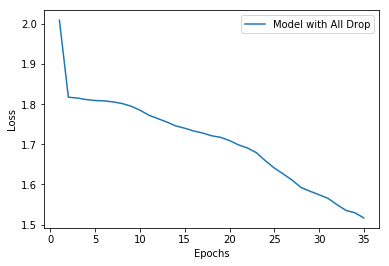

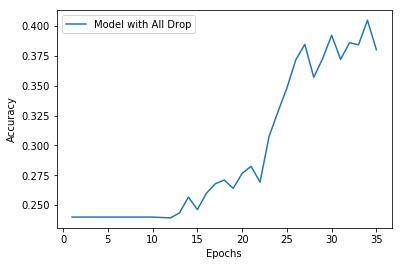

In [0]:
plot([history_11_64_more_drop], ['Model with All Drop'], "loss")
plot([history_11_64_more_drop], ['Model with All Drop'], "accuracy")

# VGG with Dropout Every Other Block

In [0]:
vgg11_64_less_drop = vgg('vgg11', True, False)

In [0]:
vgg11_64_less_drop.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history_11_64_less_drop = vgg11_64_less_drop.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_val, y_val))

Train on 25838 samples, validate on 2871 samples
Epoch 1/50
25838/25838 [==============================] - 35s 1ms/step - loss: 1.8951 - acc: 0.2409 - val_loss: 1.8445 - val_acc: 0.2400
Epoch 2/50
25838/25838 [==============================] - 33s 1ms/step - loss: 1.8159 - acc: 0.2526 - val_loss: 1.8371 - val_acc: 0.2400
Epoch 3/50
25838/25838 [==============================] - 33s 1ms/step - loss: 1.8120 - acc: 0.2526 - val_loss: 1.8277 - val_acc: 0.2400
Epoch 4/50
25838/25838 [==============================] - 33s 1ms/step - loss: 1.8091 - acc: 0.2526 - val_loss: 1.8246 - val_acc: 0.2400
Epoch 5/50
25838/25838 [==============================] - 33s 1ms/step - loss: 1.8034 - acc: 0.2524 - val_loss: 1.8125 - val_acc: 0.2421
Epoch 6/50
25838/25838 [==============================] - 33s 1ms/step - loss: 1.7899 - acc: 0.2546 - val_loss: 1.7953 - val_acc: 0.2421
Epoch 7/50
25838/25838 [==============================] - 33s 1ms/step - loss: 1.7639 - acc: 0.2652 - val_loss: 1.7576 - val_acc:

In [0]:
vgg11_64_less_drop.evaluate(X_test, y_test)

7178/7178 [==============================] - 4s 493us/step


[1.1331292657209127, 0.5865143494050993]

In [0]:
from sklearn.metrics import confusion_matrix

vgg11_64_preds_some_drop = vgg11_64_less_drop.predict(X_test)
confusion_matrix(y_test.argmax(axis=1), vgg11_64_preds_some_drop.argmax(axis=1))

array([[ 447,    6,   35,   78,  240,   11,  141],
       [  27,   34,    2,    9,   30,    0,    9],
       [ 102,    4,  194,   89,  394,   70,  171],
       [  39,    0,   12, 1516,   98,   15,   94],
       [  99,    1,   34,  115,  760,    9,  229],
       [  28,    1,   53,   71,   59,  532,   87],
       [  67,    1,   11,  126,  294,    7,  727]])

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), vgg11_64_preds_some_drop.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.55      0.47      0.51       958
           1       0.72      0.31      0.43       111
           2       0.57      0.19      0.28      1024
           3       0.76      0.85      0.80      1774
           4       0.41      0.61      0.49      1247
           5       0.83      0.64      0.72       831
           6       0.50      0.59      0.54      1233

   micro avg       0.59      0.59      0.59      7178
   macro avg       0.62      0.52      0.54      7178
weighted avg       0.60      0.59      0.57      7178



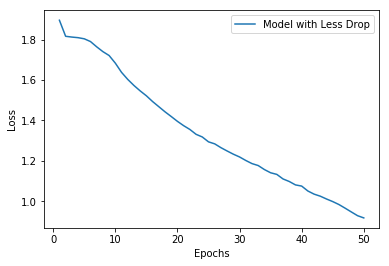

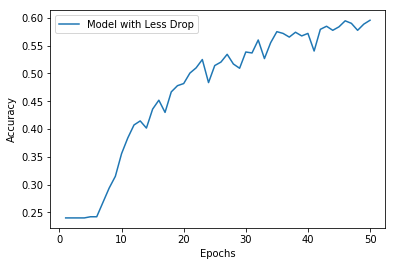

In [0]:
plot([history_11_64_less_drop], ['Model with Less Drop'], "loss")
plot([history_11_64_less_drop], ['Model with Less Drop'], "accuracy")

# Resnet50 Implementation

In [0]:
from keras.layers import Input, ZeroPadding2D, MaxPooling2D, Flatten, BatchNormalization, AveragePooling2D, Activation, Dense, Add, Conv2D
from keras.initializers import glorot_uniform
from keras import backend as K
from keras.models import Model

**The identity block passes the raw input forward and adds it to what has currently be fed through the network**

In [0]:
def identity_block(X, f, filters):
  F1, F2, F3 = filters
  
  X_original = X
  
  X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1, 1), kernel_initializer = glorot_uniform(seed=1234))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  
  X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1, 1), padding = "same", kernel_initializer = glorot_uniform(seed=1234))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  
  X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1, 1), kernel_initializer = glorot_uniform(seed=1234))(X)
  X = BatchNormalization(axis=3)(X)
  
  X = Add()([X, X_original])
  X = Activation('relu')(X)
  
  return X

**The convolutional block is located at the beginning of each module and transforms the dimension of the raw data to allow addition into the network due to the changed filter size**

In [0]:
def conv_block(X, f, filters, stride):
  F1, F2, F3 = filters
  
  X_original = X

  X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (stride, stride), kernel_initializer = glorot_uniform(seed=1234))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1, 1), padding = "same", kernel_initializer = glorot_uniform(seed=1234))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1, 1), kernel_initializer = glorot_uniform(seed=1234))(X)
  X = BatchNormalization(axis=3)(X)
  
  X_original = Conv2D(filters = F3, kernel_size = (1, 1), strides = (stride, stride), kernel_initializer = glorot_uniform(seed=1234))(X)
  X = BatchNormalization(axis=3)(X_original)
  
  X = Add()([X, X_original])
  
  X = Activation('relu')(X)
  
  return X

In [0]:
def resnet_50(input_shape=(48,48,1), output_size=7):
  model_input = Input(input_shape)
  X = ZeroPadding2D((3, 3))(model_input)
  X = Conv2D(filters = 64, kernel_size = (7, 7), strides = (2, 2), kernel_initializer = glorot_uniform(seed=1234))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((3,3), strides = (2, 2))(X)
  
  X = conv_block(X, 3, [64, 64, 256], 1)
  for i in range(2):
    X = identity_block(X, 3, [64, 64, 256])
    
  X = conv_block(X, 3, [128, 128, 512], 2)
  for i in range(3):
    X = identity_block(X, 3, [128, 128, 512])
    
  X = conv_block(X, 3, [256, 256, 1024], 2)
  for i in range(5):
     X = identity_block(X, 3, [256, 256, 1024])
    
  X = conv_block(X, 3, [512, 512, 2048], 2)
  for i in range(2):
      X = identity_block(X, 3, [512, 512, 2048])
  
  X = AveragePooling2D((1,1))(X)
  X = Flatten()(X)
  X = Dense(output_size, activation='softmax', kernel_initializer = glorot_uniform(seed=1234))(X)
  
  model = Model(inputs=model_input, outputs=X)
  
  return model

# ResNet50 with Adam Optimizer

In [0]:
# Adam was trained with the last two Conv blocks commented out. It wasn't improving on the whole network
resnet50_model_adam = resnet_50()
resnet50_model_adam.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
resnet50_model_adam.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 48, 48, 1)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 54, 54, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 24, 24, 64)   3200        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 24, 24, 64)   256         conv2d_22[0][0]                  
__________________________________________________________________________________________________
activation

In [0]:
history_resnet50_adam = resnet50_model_adam.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_val, y_val))

Train on 25838 samples, validate on 2871 samples
Epoch 1/25
25838/25838 [==============================] - 196s 8ms/step - loss: 2.6933 - acc: 0.2066 - val_loss: 11.8010 - val_acc: 0.1163
Epoch 2/25
25838/25838 [==============================] - 181s 7ms/step - loss: 2.3565 - acc: 0.2287 - val_loss: 8.2652 - val_acc: 0.1891
Epoch 3/25
25838/25838 [==============================] - 180s 7ms/step - loss: 2.4916 - acc: 0.2302 - val_loss: 4.2147 - val_acc: 0.2400
Epoch 4/25
25838/25838 [==============================] - 181s 7ms/step - loss: 2.3860 - acc: 0.2390 - val_loss: 1.8078 - val_acc: 0.2480
Epoch 5/25
25838/25838 [==============================] - 183s 7ms/step - loss: 2.1846 - acc: 0.2496 - val_loss: 2.0566 - val_acc: 0.2483
Epoch 6/25
25838/25838 [==============================] - 184s 7ms/step - loss: 2.3327 - acc: 0.2441 - val_loss: 2.0470 - val_acc: 0.2452
Epoch 7/25
25838/25838 [==============================] - 184s 7ms/step - loss: 2.1668 - acc: 0.2523 - val_loss: 1.9297 - 

In [0]:
resnet50_model_adam.evaluate(X_test, y_test)

7178/7178 [==============================] - 8s 1ms/step


[1.7710626713244422, 0.2543884090275843]

In [0]:
from sklearn.metrics import confusion_matrix

resnet50_preds_adam = resnet50_model_adam.predict(X_test)
confusion_matrix(y_test.argmax(axis=1), resnet50_preds_adam.argmax(axis=1))

array([[  0,   0,  34,  53, 462, 230, 179],
       [  0,   0,   3,   9,  54,  18,  27],
       [  0,   0,  34,  52, 451, 342, 145],
       [  0,   0,  30, 472, 527, 147, 598],
       [  0,   0,  37,  34, 614, 348, 214],
       [  0,   0,  14,  18, 246, 470,  83],
       [  0,   0,  35,  39, 717, 206, 236]])

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), resnet50_preds_adam.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       958
           1       0.00      0.00      0.00       111
           2       0.18      0.03      0.06      1024
           3       0.70      0.27      0.39      1774
           4       0.20      0.49      0.28      1247
           5       0.27      0.57      0.36       831
           6       0.16      0.19      0.17      1233

   micro avg       0.25      0.25      0.25      7178
   macro avg       0.22      0.22      0.18      7178
weighted avg       0.29      0.25      0.22      7178



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# ResNet50 with RMSProp Optimizer

In [0]:
resnet50_model_rms = resnet_50()
resnet50_model_rms.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [0]:
history_resnet50_rms = resnet50_model_rms.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_val, y_val))

Train on 25838 samples, validate on 2871 samples
Epoch 1/25
25838/25838 [==============================] - 182s 7ms/step - loss: 3.1949 - acc: 0.2011 - val_loss: 9.9366 - val_acc: 0.1891
Epoch 2/25
25838/25838 [==============================] - 165s 6ms/step - loss: 3.1036 - acc: 0.2258 - val_loss: 11.8921 - val_acc: 0.1668
Epoch 3/25
25838/25838 [==============================] - 165s 6ms/step - loss: 3.1373 - acc: 0.2359 - val_loss: 2.1974 - val_acc: 0.1376
Epoch 4/25
25838/25838 [==============================] - 165s 6ms/step - loss: 2.3905 - acc: 0.2496 - val_loss: 2.7848 - val_acc: 0.1930
Epoch 5/25
25838/25838 [==============================] - 165s 6ms/step - loss: 2.4011 - acc: 0.2470 - val_loss: 6.9386 - val_acc: 0.2076
Epoch 6/25
25838/25838 [==============================] - 165s 6ms/step - loss: 2.3791 - acc: 0.2470 - val_loss: 3.2366 - val_acc: 0.2302
Epoch 7/25
25838/25838 [==============================] - 165s 6ms/step - loss: 2.4058 - acc: 0.2421 - val_loss: 2.9974 - 

In [0]:
resnet50_model_rms.evaluate(X_test, y_test)

7178/7178 [==============================] - 8s 1ms/step


[13.349411758482374, 0.17177486765530822]

In [0]:
from sklearn.metrics import confusion_matrix

resnet50_preds_rms = resnet50_model_rms.predict(X_test)
confusion_matrix(y_test.argmax(axis=1), resnet50_preds_rms.argmax(axis=1))

array([[   0,    0,    0,    0,    0,    0,  958],
       [   0,    0,    0,    0,    0,    0,  111],
       [   0,    0,    0,    0,    0,    0, 1024],
       [   0,    0,    0,    0,    0,    0, 1774],
       [   0,    0,    0,    0,    0,    0, 1247],
       [   0,    0,    0,    0,    0,    0,  831],
       [   0,    0,    0,    0,    0,    0, 1233]])

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), resnet50_preds_rms.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       958
           1       0.00      0.00      0.00       111
           2       0.00      0.00      0.00      1024
           3       0.00      0.00      0.00      1774
           4       0.00      0.00      0.00      1247
           5       0.00      0.00      0.00       831
           6       0.17      1.00      0.29      1233

   micro avg       0.17      0.17      0.17      7178
   macro avg       0.02      0.14      0.04      7178
weighted avg       0.03      0.17      0.05      7178



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


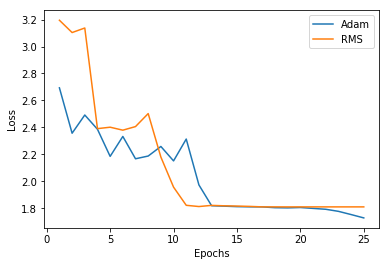

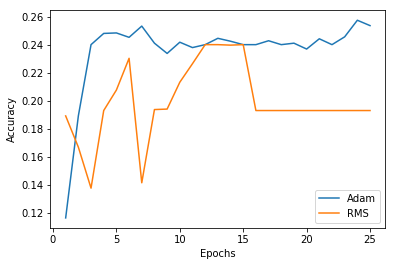

In [0]:
import matplotlib.pyplot as plt

resnet_adam_histories = [history_resnet50_adam, history_resnet50_rms]
labels = ["Adam", "RMS"]
plot(resnet_adam_histories, labels, "loss")
plot(resnet_adam_histories, labels, "accuracy")

# Resnet 18 Implementation

In [0]:
from keras.layers import Input, ZeroPadding2D, MaxPooling2D, Flatten, BatchNormalization, AveragePooling2D, Activation, Dense, Add, Conv2D
from keras.initializers import glorot_uniform
from keras import backend as K
from keras.models import Model

In [0]:
def identity_block_18(X, f, filters):
  F1, F2 = filters
  
  X_original = X
  
  X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1, 1), kernel_initializer = glorot_uniform(seed=1234))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  
  X = Conv2D(filters = F2, kernel_size = (1, 1), strides = (1, 1), kernel_initializer = glorot_uniform(seed=1234))(X)
  X = BatchNormalization(axis=3)(X)
  
  X = Add()([X, X_original])
  X = Activation('relu')(X)
  
  return X

In [0]:
def conv_block_18(X, f, filters, stride):
  F1, F2 = filters
  
  X_original = X

  X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (stride, stride), kernel_initializer = glorot_uniform(seed=1234))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  X = Conv2D(filters = F2, kernel_size = (1, 1), strides = (1, 1), kernel_initializer = glorot_uniform(seed=1234))(X)
  X = BatchNormalization(axis=3)(X)
  
  X_original = Conv2D(filters = F2, kernel_size = (1, 1), strides = (stride, stride), kernel_initializer = glorot_uniform(seed=1234))(X)
  X = BatchNormalization(axis=3)(X_original)
  
  X = Add()([X, X_original])
  
  X = Activation('relu')(X)
  
  return X

In [0]:
def resnet_18(input_shape=(48,48,1), output_size=7):
  model_input = Input(input_shape)
  X = ZeroPadding2D((3, 3))(model_input)
  X = Conv2D(filters = 64, kernel_size = (7, 7), strides = (2, 2), kernel_initializer = glorot_uniform(seed=1234))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((3,3), strides = (2, 2))(X)
  
  X = conv_block_18(X, 3, [64, 64], 1)
  for i in range(1):
    X = identity_block_18(X, 3, [64, 64])
    
  X = conv_block_18(X, 3, [128, 128], 2)
  for i in range(1):
    X = identity_block_18(X, 3, [128, 128])
    
  X = conv_block_18(X, 3, [128, 128], 2)
  for i in range(1):
     X = identity_block_18(X, 3, [128, 128])
    
  X = conv_block_18(X, 3, [128, 128], 2)
  for i in range(1):
      X = identity_block_18(X, 3, [128, 128])
  
  X = AveragePooling2D((1,1))(X)
  X = Flatten()(X)
  X = Dense(output_size, activation='softmax', kernel_initializer = glorot_uniform(seed=1234))(X)
  
  model = Model(inputs=model_input, outputs=X)
  
  return model

In [0]:
resnet18_model_adam = resnet_18()
resnet18_model_adam.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
resnet18_model_adam.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 48, 48, 1)    0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 54, 54, 1)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_75 (Conv2D)              (None, 24, 24, 64)   3200        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
batch_normalization_54 (BatchNo (None, 24, 24, 64)   256         conv2d_75[0][0]                  
__________________________________________________________________________________________________
activation

In [0]:
history_resnet18_adam = resnet18_model_adam.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_val, y_val))

Train on 25838 samples, validate on 2871 samples
Epoch 1/25
25838/25838 [==============================] - 27s 1ms/step - loss: 1.9283 - acc: 0.2231 - val_loss: 1.8520 - val_acc: 0.2330
Epoch 2/25
25838/25838 [==============================] - 17s 656us/step - loss: 1.8488 - acc: 0.2393 - val_loss: 1.9090 - val_acc: 0.2295
Epoch 3/25
25838/25838 [==============================] - 17s 654us/step - loss: 1.8487 - acc: 0.2419 - val_loss: 1.9117 - val_acc: 0.2355
Epoch 4/25
25838/25838 [==============================] - 17s 653us/step - loss: 1.8435 - acc: 0.2427 - val_loss: 1.9272 - val_acc: 0.1895
Epoch 5/25
25838/25838 [==============================] - 17s 652us/step - loss: 1.8381 - acc: 0.2419 - val_loss: 2.2031 - val_acc: 0.2372
Epoch 6/25
25838/25838 [==============================] - 17s 650us/step - loss: 1.8449 - acc: 0.2410 - val_loss: 1.8177 - val_acc: 0.2344
Epoch 7/25
25838/25838 [==============================] - 17s 647us/step - loss: 1.8356 - acc: 0.2428 - val_loss: 2.274

In [0]:
resnet18_model_adam.evaluate(X_test, y_test)

7178/7178 [==============================] - 2s 246us/step


[1.8120671747852812, 0.24993034273045545]

In [0]:
from sklearn.metrics import confusion_matrix

resnet18_preds_adam = resnet18_model_adam.predict(X_test)
confusion_matrix(y_test.argmax(axis=1), resnet18_preds_adam.argmax(axis=1))

array([[   0,    0,    0,  897,    5,   56,    0],
       [   0,    0,    0,  104,    0,    7,    0],
       [   0,    0,    0,  939,    2,   83,    0],
       [   0,    0,    0, 1673,    9,   92,    0],
       [   0,    0,    0, 1209,    4,   34,    0],
       [   0,    0,    0,  713,    1,  117,    0],
       [   0,    0,    0, 1157,    8,   68,    0]])

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), resnet18_preds_adam.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       958
           1       0.00      0.00      0.00       111
           2       0.00      0.00      0.00      1024
           3       0.25      0.94      0.40      1774
           4       0.14      0.00      0.01      1247
           5       0.26      0.14      0.18       831
           6       0.00      0.00      0.00      1233

   micro avg       0.25      0.25      0.25      7178
   macro avg       0.09      0.16      0.08      7178
weighted avg       0.12      0.25      0.12      7178



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
resnet18_model_rms = resnet_18()
resnet18_model_rms.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [0]:
history_resnet18_rms = resnet18_model_rms.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_val, y_val))

Train on 25838 samples, validate on 2871 samples
Epoch 1/25
25838/25838 [==============================] - 26s 1ms/step - loss: 1.9804 - acc: 0.2232 - val_loss: 1.8784 - val_acc: 0.2097
Epoch 2/25
25838/25838 [==============================] - 16s 626us/step - loss: 1.8773 - acc: 0.2396 - val_loss: 1.8713 - val_acc: 0.2400
Epoch 3/25
25838/25838 [==============================] - 16s 623us/step - loss: 1.8702 - acc: 0.2447 - val_loss: 2.4353 - val_acc: 0.2215
Epoch 4/25
25838/25838 [==============================] - 16s 622us/step - loss: 1.8690 - acc: 0.2385 - val_loss: 1.8156 - val_acc: 0.2389
Epoch 5/25
25838/25838 [==============================] - 16s 625us/step - loss: 1.8688 - acc: 0.2444 - val_loss: 1.9188 - val_acc: 0.2382
Epoch 6/25
25838/25838 [==============================] - 16s 622us/step - loss: 1.8632 - acc: 0.2470 - val_loss: 1.8201 - val_acc: 0.1982
Epoch 7/25
25838/25838 [==============================] - 16s 618us/step - loss: 1.8558 - acc: 0.2490 - val_loss: 1.991

In [0]:
resnet18_model_rms.evaluate(X_test, y_test)

7178/7178 [==============================] - 2s 247us/step


[1.822060467805594, 0.25118417388119385]

In [0]:
from sklearn.metrics import confusion_matrix

resnet18_preds_rms = resnet18_model_rms.predict(X_test)
confusion_matrix(y_test.argmax(axis=1), resnet18_preds_rms.argmax(axis=1))

array([[   0,    0,    0,  870,    3,   81,    4],
       [   0,    0,    0,  107,    0,    3,    1],
       [   0,    0,    0,  922,    1,   99,    2],
       [   0,    0,    0, 1672,    4,   98,    0],
       [   0,    0,    0, 1208,    1,   35,    3],
       [   0,    0,    0,  701,    0,  129,    1],
       [   0,    0,    0, 1161,    4,   67,    1]])

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), resnet18_preds_rms.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       958
           1       0.00      0.00      0.00       111
           2       0.00      0.00      0.00      1024
           3       0.25      0.94      0.40      1774
           4       0.08      0.00      0.00      1247
           5       0.25      0.16      0.19       831
           6       0.08      0.00      0.00      1233

   micro avg       0.25      0.25      0.25      7178
   macro avg       0.09      0.16      0.08      7178
weighted avg       0.12      0.25      0.12      7178



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


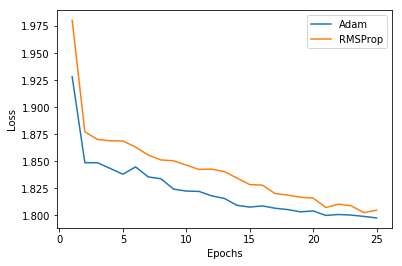

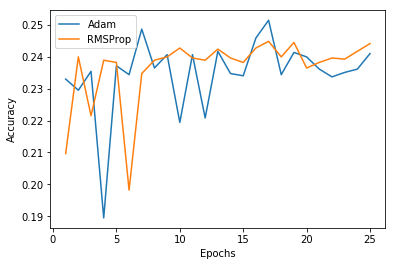

In [0]:
import matplotlib.pyplot as plt

resnet_adam_histories = [history_resnet18_adam, history_resnet18_rms]
labels = ["Adam", "RMSProp"]
plot(resnet_adam_histories, labels, "loss")
plot(resnet_adam_histories, labels, "accuracy")

# Modified ResNet(10)

In [0]:
def resnet_modified(input_shape=(48,48,1), output_size=7):
  model_input = Input(input_shape)
  X = ZeroPadding2D((3, 3))(model_input)
  X = Conv2D(filters = 64, kernel_size = (7, 7), strides = (2, 2), kernel_initializer = glorot_uniform(seed=1234))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((3,3), strides = (2, 2))(X)
  
  X = conv_block_18(X, 3, [64, 64], 1)
  for i in range(1):
    X = identity_block_18(X, 3, [64, 64])
    
  X = conv_block_18(X, 3, [128, 128], 2)
  for i in range(1):
    X = identity_block_18(X, 3, [128, 128])
    
  X = AveragePooling2D((1,1))(X)
  X = Flatten()(X)
  X = Dense(output_size, activation='softmax', kernel_initializer = glorot_uniform(seed=1234))(X)
  
  model = Model(inputs=model_input, outputs=X)
  
  return model

**Modified ResNet with adam optimizer and batch size of 32**

In [0]:
resnet_modified_adam_32 = resnet_modified()
resnet_modified_adam_32.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history_resnet_modified_adam_32 = resnet_modified_adam_32.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_val, y_val))

Train on 25838 samples, validate on 2871 samples
Epoch 1/50
25838/25838 [==============================] - 32s 1ms/step - loss: 1.8655 - acc: 0.3063 - val_loss: 1.8763 - val_acc: 0.2501
Epoch 2/50
25838/25838 [==============================] - 22s 852us/step - loss: 1.6325 - acc: 0.3679 - val_loss: 1.6620 - val_acc: 0.3417
Epoch 3/50
25838/25838 [==============================] - 22s 855us/step - loss: 1.5525 - acc: 0.3937 - val_loss: 1.5725 - val_acc: 0.3929
Epoch 4/50
25838/25838 [==============================] - 22s 855us/step - loss: 1.5101 - acc: 0.4120 - val_loss: 1.8759 - val_acc: 0.2738
Epoch 5/50
25838/25838 [==============================] - 22s 854us/step - loss: 1.4778 - acc: 0.4287 - val_loss: 1.5453 - val_acc: 0.4037
Epoch 6/50
25838/25838 [==============================] - 22s 854us/step - loss: 1.4522 - acc: 0.4353 - val_loss: 1.5637 - val_acc: 0.4006
Epoch 7/50
25838/25838 [==============================] - 22s 852us/step - loss: 1.4288 - acc: 0.4457 - val_loss: 1.613

In [0]:
resnet_modified_adam_32.evaluate(X_test,y_test)

7178/7178 [==============================] - 2s 219us/step


[2.2391051502073664, 0.43229311787673574]

In [0]:
from sklearn.metrics import confusion_matrix

resnet_modified_adam_32_preds = resnet_modified_adam_32.predict(X_test)
confusion_matrix(y_test.argmax(axis=1), resnet_modified_adam_32_preds.argmax(axis=1))

array([[ 288,   15,  119,  174,  165,   37,  160],
       [  19,   31,   13,   19,   16,    4,    9],
       [ 141,   10,  260,  166,  158,  103,  186],
       [ 128,   10,   77, 1147,  146,   50,  216],
       [ 169,   13,  146,  246,  345,   46,  282],
       [  60,    3,   81,   81,   55,  485,   66],
       [ 160,   12,  101,  190,  188,   35,  547]])

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), resnet_modified_adam_32_preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.30      0.30      0.30       958
           1       0.33      0.28      0.30       111
           2       0.33      0.25      0.29      1024
           3       0.57      0.65      0.60      1774
           4       0.32      0.28      0.30      1247
           5       0.64      0.58      0.61       831
           6       0.37      0.44      0.41      1233

   micro avg       0.43      0.43      0.43      7178
   macro avg       0.41      0.40      0.40      7178
weighted avg       0.43      0.43      0.43      7178



**Modified ResNet with adam optimizer and batch size 64**

In [0]:
resnet_modified_adam_64 = resnet_modified()
resnet_modified_adam_64.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history_resnet_modified_adam_64 = resnet_modified_adam_64.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_val, y_val))

Train on 25838 samples, validate on 2871 samples
Epoch 1/50
25838/25838 [==============================] - 22s 857us/step - loss: 1.8537 - acc: 0.3088 - val_loss: 1.8861 - val_acc: 0.2828
Epoch 2/50
25838/25838 [==============================] - 12s 451us/step - loss: 1.6364 - acc: 0.3708 - val_loss: 1.8019 - val_acc: 0.2884
Epoch 3/50
25838/25838 [==============================] - 12s 450us/step - loss: 1.5630 - acc: 0.3958 - val_loss: 1.7004 - val_acc: 0.3452
Epoch 4/50
25838/25838 [==============================] - 12s 447us/step - loss: 1.5087 - acc: 0.4190 - val_loss: 1.6257 - val_acc: 0.3800
Epoch 5/50
25838/25838 [==============================] - 12s 448us/step - loss: 1.4767 - acc: 0.4302 - val_loss: 1.5722 - val_acc: 0.3936
Epoch 6/50
25838/25838 [==============================] - 11s 443us/step - loss: 1.4498 - acc: 0.4404 - val_loss: 1.7191 - val_acc: 0.3023
Epoch 7/50
25838/25838 [==============================] - 11s 444us/step - loss: 1.4264 - acc: 0.4512 - val_loss: 1.7

In [0]:
resnet_modified_adam_64.evaluate(X_test,y_test)

7178/7178 [==============================] - 1s 206us/step


[2.682718274785337, 0.3774031763764004]

In [0]:
from sklearn.metrics import confusion_matrix

resnet_modified_adam_64_preds = resnet_modified_adam_64.predict(X_test)
confusion_matrix(y_test.argmax(axis=1), resnet_modified_adam_64_preds.argmax(axis=1))

array([[344,   6, 173, 117, 152,  34, 132],
       [ 26,  23,  21,   7,  21,   3,  10],
       [178,   5, 322, 117, 193,  68, 141],
       [205,   4, 166, 911, 218,  34, 236],
       [253,   3, 231, 153, 341,  34, 232],
       [ 81,   0, 185,  63,  61, 373,  68],
       [196,   4, 192, 166, 244,  36, 395]])

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), resnet_modified_adam_64_preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.27      0.36      0.31       958
           1       0.51      0.21      0.29       111
           2       0.25      0.31      0.28      1024
           3       0.59      0.51      0.55      1774
           4       0.28      0.27      0.28      1247
           5       0.64      0.45      0.53       831
           6       0.33      0.32      0.32      1233

   micro avg       0.38      0.38      0.38      7178
   macro avg       0.41      0.35      0.37      7178
weighted avg       0.40      0.38      0.39      7178



**Modified ResNet with adam optimizer and batch size 128**

In [0]:
resnet_modified_adam_128 = resnet_modified()
resnet_modified_adam_128.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history_resnet_modified_adam_128 = resnet_modified_adam_128.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val))

Train on 25838 samples, validate on 2871 samples
Epoch 1/50
25838/25838 [==============================] - 18s 702us/step - loss: 1.8554 - acc: 0.3093 - val_loss: 1.9325 - val_acc: 0.2929
Epoch 2/50
25838/25838 [==============================] - 7s 262us/step - loss: 1.6469 - acc: 0.3659 - val_loss: 1.8562 - val_acc: 0.2891
Epoch 3/50
25838/25838 [==============================] - 7s 263us/step - loss: 1.5596 - acc: 0.3957 - val_loss: 1.7841 - val_acc: 0.2968
Epoch 4/50
25838/25838 [==============================] - 7s 262us/step - loss: 1.5216 - acc: 0.4108 - val_loss: 1.9477 - val_acc: 0.2727
Epoch 5/50
25838/25838 [==============================] - 7s 261us/step - loss: 1.4789 - acc: 0.4294 - val_loss: 1.6552 - val_acc: 0.3602
Epoch 6/50
25838/25838 [==============================] - 7s 260us/step - loss: 1.4457 - acc: 0.4411 - val_loss: 1.7226 - val_acc: 0.3365
Epoch 7/50
25838/25838 [==============================] - 7s 262us/step - loss: 1.4154 - acc: 0.4533 - val_loss: 1.9596 - 

In [0]:
resnet_modified_adam_128.evaluate(X_test,y_test)

7178/7178 [==============================] - 1s 205us/step


[3.0088442420853183, 0.39439955419752054]

In [0]:
from sklearn.metrics import confusion_matrix

resnet_modified_adam_128_preds = resnet_modified_adam_128.predict(X_test)
confusion_matrix(y_test.argmax(axis=1), resnet_modified_adam_128_preds.argmax(axis=1))

array([[ 240,   11,  198,  159,  188,   71,   91],
       [  23,   25,   27,    8,   24,    2,    2],
       [ 140,    4,  336,  117,  195,  143,   89],
       [ 159,   11,  166, 1014,  201,   90,  133],
       [ 200,   16,  223,  169,  432,   81,  126],
       [  49,    9,  152,   65,   48,  476,   32],
       [ 143,   10,  208,  207,  248,  109,  308]])

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), resnet_modified_adam_128_preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.25      0.25      0.25       958
           1       0.29      0.23      0.25       111
           2       0.26      0.33      0.29      1024
           3       0.58      0.57      0.58      1774
           4       0.32      0.35      0.33      1247
           5       0.49      0.57      0.53       831
           6       0.39      0.25      0.31      1233

   micro avg       0.39      0.39      0.39      7178
   macro avg       0.37      0.36      0.36      7178
weighted avg       0.40      0.39      0.39      7178



**Modified ResNet with RMSProp optimizer and batch size 32**

In [0]:
resnet_modified_rms_32 = resnet_modified()
resnet_modified_rms_32.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [0]:
history_resnet_modified_rms_32 = resnet_modified_rms_32.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_val, y_val))

Train on 25838 samples, validate on 2871 samples
Epoch 1/50
25838/25838 [==============================] - 32s 1ms/step - loss: 1.9326 - acc: 0.2981 - val_loss: 2.3990 - val_acc: 0.1707
Epoch 2/50
25838/25838 [==============================] - 21s 797us/step - loss: 1.6196 - acc: 0.3719 - val_loss: 1.6983 - val_acc: 0.3420
Epoch 3/50
25838/25838 [==============================] - 21s 799us/step - loss: 1.5539 - acc: 0.3984 - val_loss: 1.6929 - val_acc: 0.3553
Epoch 4/50
25838/25838 [==============================] - 21s 801us/step - loss: 1.5100 - acc: 0.4149 - val_loss: 1.5674 - val_acc: 0.3950
Epoch 5/50
25838/25838 [==============================] - 21s 806us/step - loss: 1.4801 - acc: 0.4311 - val_loss: 1.8818 - val_acc: 0.2511
Epoch 6/50
25838/25838 [==============================] - 21s 799us/step - loss: 1.4542 - acc: 0.4390 - val_loss: 1.6616 - val_acc: 0.3734
Epoch 7/50
25838/25838 [==============================] - 21s 796us/step - loss: 1.4264 - acc: 0.4522 - val_loss: 2.293

In [0]:
resnet_modified_rms_32.evaluate(X_test,y_test)

7178/7178 [==============================] - 2s 236us/step


[2.009080599197341, 0.34772917247559243]

In [0]:
from sklearn.metrics import confusion_matrix

resnet_modified_rms_32_preds = resnet_modified_rms_32.predict(X_test)
confusion_matrix(y_test.argmax(axis=1), resnet_modified_rms_32_preds.argmax(axis=1))

array([[318,  54, 149,  71, 123, 164,  79],
       [ 24,  29,  20,   7,  11,  15,   5],
       [162,  54, 239,  70, 137, 294,  68],
       [211,  37, 211, 723, 184, 288, 120],
       [232,  54, 193,  94, 300, 233, 141],
       [ 48,  11,  84,  30,  24, 610,  24],
       [195,  35, 171,  84, 176, 295, 277]])

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), resnet_modified_rms_32_preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.27      0.33      0.30       958
           1       0.11      0.26      0.15       111
           2       0.22      0.23      0.23      1024
           3       0.67      0.41      0.51      1774
           4       0.31      0.24      0.27      1247
           5       0.32      0.73      0.45       831
           6       0.39      0.22      0.28      1233

   micro avg       0.35      0.35      0.35      7178
   macro avg       0.33      0.35      0.31      7178
weighted avg       0.39      0.35      0.35      7178



**Modified ResNet with RMSProp optimizer and batch size 64**

In [0]:
resnet_modified_rms_64 = resnet_modified()
resnet_modified_rms_64.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [0]:
history_resnet_modified_rms_64 = resnet_modified_rms_64.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_val, y_val))

Train on 25838 samples, validate on 2871 samples
Epoch 1/50
25838/25838 [==============================] - 23s 903us/step - loss: 1.9898 - acc: 0.2910 - val_loss: 2.0158 - val_acc: 0.2163
Epoch 2/50
25838/25838 [==============================] - 11s 426us/step - loss: 1.6454 - acc: 0.3671 - val_loss: 1.7816 - val_acc: 0.3020
Epoch 3/50
25838/25838 [==============================] - 11s 426us/step - loss: 1.5541 - acc: 0.3975 - val_loss: 1.9285 - val_acc: 0.2288
Epoch 4/50
25838/25838 [==============================] - 11s 426us/step - loss: 1.5089 - acc: 0.4152 - val_loss: 1.6133 - val_acc: 0.3762
Epoch 5/50
25838/25838 [==============================] - 11s 426us/step - loss: 1.4707 - acc: 0.4281 - val_loss: 1.6017 - val_acc: 0.3668
Epoch 6/50
25838/25838 [==============================] - 11s 427us/step - loss: 1.4400 - acc: 0.4448 - val_loss: 1.6177 - val_acc: 0.3692
Epoch 7/50
25838/25838 [==============================] - 11s 425us/step - loss: 1.4156 - acc: 0.4585 - val_loss: 1.6

In [0]:
resnet_modified_rms_64.evaluate(X_test,y_test)

7178/7178 [==============================] - 2s 219us/step


[2.378287508548153, 0.4109779883017278]

In [0]:
from sklearn.metrics import confusion_matrix

resnet_modified_rms_64_preds = resnet_modified_rms_64.predict(X_test)
confusion_matrix(y_test.argmax(axis=1), resnet_modified_rms_64_preds.argmax(axis=1))

array([[227,   4, 123, 121, 168, 122, 193],
       [ 17,  17,  16,  16,  22,  12,  11],
       [ 95,   3, 257, 119, 192, 204, 154],
       [102,   4, 123, 996, 199, 140, 210],
       [133,   7, 143, 172, 401, 131, 260],
       [ 31,   3,  69,  48,  40, 587,  53],
       [108,   3, 111, 169, 232, 145, 465]])

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), resnet_modified_rms_64_preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.32      0.24      0.27       958
           1       0.41      0.15      0.22       111
           2       0.31      0.25      0.28      1024
           3       0.61      0.56      0.58      1774
           4       0.32      0.32      0.32      1247
           5       0.44      0.71      0.54       831
           6       0.35      0.38      0.36      1233

   micro avg       0.41      0.41      0.41      7178
   macro avg       0.39      0.37      0.37      7178
weighted avg       0.41      0.41      0.40      7178



**Modified ResNet with RMSProp optimizer and batch size 128**

In [0]:
resnet_modified_rms_128 = resnet_modified()
resnet_modified_rms_128.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [0]:
history_resnet_modified_rms_128 = resnet_modified_rms_128.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val))

Train on 25838 samples, validate on 2871 samples
Epoch 1/50
25838/25838 [==============================] - 19s 748us/step - loss: 2.0837 - acc: 0.2853 - val_loss: 2.6102 - val_acc: 0.2637
Epoch 2/50
25838/25838 [==============================] - 6s 251us/step - loss: 1.6749 - acc: 0.3551 - val_loss: 1.8477 - val_acc: 0.2849
Epoch 3/50
25838/25838 [==============================] - 7s 253us/step - loss: 1.5769 - acc: 0.3899 - val_loss: 1.7602 - val_acc: 0.3229
Epoch 4/50
25838/25838 [==============================] - 7s 253us/step - loss: 1.5141 - acc: 0.4149 - val_loss: 1.8272 - val_acc: 0.2644
Epoch 5/50
25838/25838 [==============================] - 7s 253us/step - loss: 1.4730 - acc: 0.4297 - val_loss: 1.8301 - val_acc: 0.2957
Epoch 6/50
25838/25838 [==============================] - 7s 254us/step - loss: 1.4383 - acc: 0.4402 - val_loss: 1.6043 - val_acc: 0.3932
Epoch 7/50
25838/25838 [==============================] - 7s 256us/step - loss: 1.4072 - acc: 0.4548 - val_loss: 1.7791 - 

In [0]:
resnet_modified_rms_128.evaluate(X_test,y_test)

7178/7178 [==============================] - 2s 211us/step


[2.9037690250346775, 0.4027584285399282]

In [0]:
from sklearn.metrics import confusion_matrix

resnet_modified_rms_128_preds = resnet_modified_rms_128.predict(X_test)
confusion_matrix(y_test.argmax(axis=1), resnet_modified_rms_128_preds.argmax(axis=1))

array([[ 400,   14,  136,  167,  101,   61,   79],
       [  31,   24,   16,   16,   11,    7,    6],
       [ 239,    4,  292,  148,  106,  139,   96],
       [ 234,    6,  134, 1070,  109,  103,  118],
       [ 305,   10,  181,  240,  279,   83,  149],
       [  89,    1,   95,   67,   23,  507,   49],
       [ 260,   13,  153,  253,  135,  100,  319]])

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), resnet_modified_rms_128_preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.26      0.42      0.32       958
           1       0.33      0.22      0.26       111
           2       0.29      0.29      0.29      1024
           3       0.55      0.60      0.57      1774
           4       0.37      0.22      0.28      1247
           5       0.51      0.61      0.55       831
           6       0.39      0.26      0.31      1233

   micro avg       0.40      0.40      0.40      7178
   macro avg       0.38      0.37      0.37      7178
weighted avg       0.40      0.40      0.39      7178



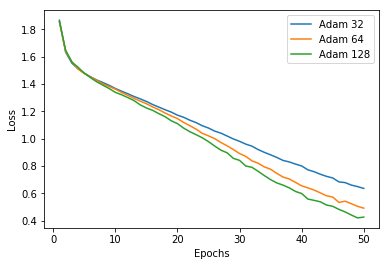

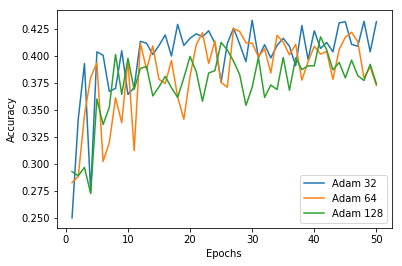

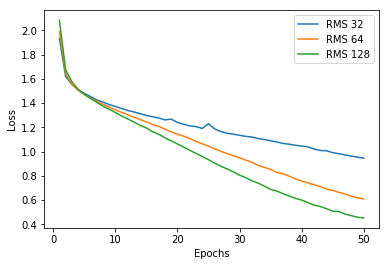

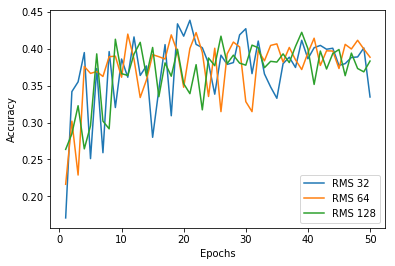

In [0]:
import matplotlib.pyplot as plt

resnet_adam_histories = [history_resnet_modified_adam_32, history_resnet_modified_adam_64, history_resnet_modified_adam_128]
resnet_rms_histories = [history_resnet_modified_rms_32, history_resnet_modified_rms_64, history_resnet_modified_rms_128]
labels_adam = ["Adam 32", "Adam 64", "Adam 128"]
labels_rms = ["RMS 32", "RMS 64", "RMS 128"]
plot(resnet_adam_histories, labels_adam, "loss")
plot(resnet_adam_histories, labels_adam, "accuracy")
plot(resnet_rms_histories, labels_rms, "loss")
plot(resnet_rms_histories, labels_rms, "accuracy")

# Our Model 

**This model was inspired by the the VGG block architeture. We implemented VGG11 style, but addewd batch normalization after each layer and increased the filter shape by an increasing odd number (3x3), (5x5), and (7x7). In addition we added an attention component, which emphasizes certain pixels of the image in which the model will make predictions off of more. **

In [1]:
from keras.layers import Dense, Dropout,  Conv2D, Input, Lambda, Flatten, TimeDistributed
from keras.layers import Add, Reshape, MaxPooling2D, Concatenate, Embedding, RepeatVector, Dot, Softmax, BatchNormalization
from keras.models import Model
from keras import backend as K

import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.engine.topology import Layer
import tensorflow as tf
from keras.callbacks import TensorBoard


def self_model(attn):
  
  inp = Input(shape = (48,48,1))

  # Convolution Block 1
  x = (Conv2D(64, (3,3), activation='relu', padding='same'))(inp)
  x = (BatchNormalization())(x)
  x = (Conv2D(64, (3,3), activation='relu', padding='same'))(x)
  x = (BatchNormalization())(x)
  x = (MaxPooling2D(pool_size=(2,2), strides=(2,2)))(x)

  # Convolution Block 2
  x = (Conv2D(128, (3,3), activation='relu', padding='same'))(x)
  x = (BatchNormalization())(x)
  x = (Conv2D(128, (3,3), activation='relu', padding='same'))(x)
  x = (BatchNormalization())(x)
  x = (MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))(x)


  # Conv Block 3
  x = (Conv2D(512, (5,5), activation='relu', padding='same'))(x)
  x = (BatchNormalization())(x)
  x = (Conv2D(512, (5,5), activation='relu', padding='same'))(x)
  x = (BatchNormalization())(x)
  x = (MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))(x)

  # Conv Block 4
  x = (Conv2D(512, (7,7), activation='relu', padding='same'))(x)
  x = (BatchNormalization())(x)
  x = (Conv2D(512, (7,7), activation='relu', padding='same'))(x)
  x = (BatchNormalization())(x)
  x = (MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))(x)
 
  # Add attention
  if(attn):
    x = Reshape([3*3,64*8])(x) 
    x2 = Dense(64*8, activation = "relu")(x)
    x2 = Reshape([9, 8, 64])(x2)
    
   
    att = Lambda(lambda z: K.batch_dot(z[0],z[1] ,axes=[-1,-1]) / np.sqrt(64),
                 output_shape=(9, 8, 8))([x2,x2])
    att = Lambda(lambda z:  K.softmax(z) , output_shape=(9, 8, 8))(att)

    
    out = Lambda(lambda z: K.batch_dot(z[0], z[1],axes=[4,3]),  output_shape=(9, 8, 64))([att, x2])
    out = Reshape([9, 64*8])(out)
    
    out = Add()([out, x])

    out = Dense(32, activation = "relu")(out)
    x = out
    x = Reshape([3,3,32])(x)   
    x = (BatchNormalization())(x)


  # FC layers
  x =  (Flatten())(x)
  x =  (Dense(2048, activation='relu'))(x)
  x =  (Dense(2048, activation='relu'))(x)
  x =  (Dense(7, activation='softmax'))(x)

  return Model(inputs=inp, outputs=x)

Using TensorFlow backend.


In [2]:
our_model_attn = self_model(True)
our_model_attn.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
our_model_attn.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 48, 48, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 48, 48, 64)   640         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 48, 48, 64)   256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 48, 48, 64)   36928       batch_normalization_1[0][0]      
__________________________________________________________________________________________________
batch_norm

In [0]:
our_model_history = our_model_attn.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 25838 samples, validate on 2871 samples
Epoch 1/10
25838/25838 [==============================] - 136s 5ms/step - loss: 1.7088 - acc: 0.3153 - val_loss: 1.6684 - val_acc: 0.3588
Epoch 2/10
25838/25838 [==============================] - 127s 5ms/step - loss: 1.3626 - acc: 0.4663 - val_loss: 1.4465 - val_acc: 0.4260
Epoch 3/10
25838/25838 [==============================] - 126s 5ms/step - loss: 1.1944 - acc: 0.5460 - val_loss: 1.2295 - val_acc: 0.5361
Epoch 4/10
25838/25838 [==============================] - 126s 5ms/step - loss: 1.0661 - acc: 0.5952 - val_loss: 1.2060 - val_acc: 0.5500
Epoch 5/10
25838/25838 [==============================] - 126s 5ms/step - loss: 0.9487 - acc: 0.6442 - val_loss: 1.1448 - val_acc: 0.5733
Epoch 6/10
25838/25838 [==============================] - 126s 5ms/step - loss: 0.8153 - acc: 0.6943 - val_loss: 1.1255 - val_acc: 0.6102
Epoch 7/10
25838/25838 [==============================] - 126s 5ms/step - l

In [0]:
our_model_attn.evaluate(X_test, y_test)

7178/7178 [==============================] - 15s 2ms/step


[1.4858571157776967, 0.6136806910085825]

In [0]:
from sklearn.metrics import confusion_matrix

our_preds = our_model_attn.predict(X_test)
confusion_matrix(y_test.argmax(axis=1), our_preds.argmax(axis=1))

array([[ 388,   11,  170,   52,  214,   17,  106],
       [  12,   54,   21,    7,   10,    2,    5],
       [  46,    1,  549,   39,  248,   50,   91],
       [  14,    0,   58, 1444,  129,   21,  108],
       [  58,    1,  221,   53,  711,   12,  191],
       [  10,    0,  192,   48,   22,  538,   21],
       [  39,    1,  116,   84,  261,   11,  721]])

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), our_preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.68      0.41      0.51       958
           1       0.79      0.49      0.60       111
           2       0.41      0.54      0.47      1024
           3       0.84      0.81      0.82      1774
           4       0.45      0.57      0.50      1247
           5       0.83      0.65      0.73       831
           6       0.58      0.58      0.58      1233

   micro avg       0.61      0.61      0.61      7178
   macro avg       0.65      0.58      0.60      7178
weighted avg       0.64      0.61      0.62      7178



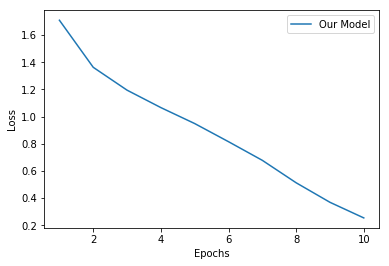

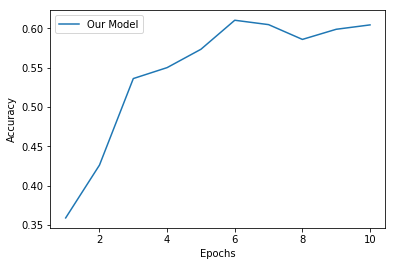

In [0]:
import matplotlib.pyplot as plt

our_model_histories = [our_model_history]
labels = ["Our Model"]
plot(our_model_histories, labels, "loss")
plot(our_model_histories, labels, "accuracy")

In [0]:
our_model_attn.layers[11].output[0, :, :, 0]

<tf.Tensor 'strided_slice:0' shape=(12, 12) dtype=float32>

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()            
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 20.3MB/s 


In [0]:
# Save keras model.
our_model_attn.save('our_model_attn.h5')
model_file = drive.CreateFile({'our_model_attn' : 'our_model_attn.h5'})                       
model_file.SetContentFile('our_model_attn.h5')                       
model_file.Upload()

In [0]:
import keras
from keras.models import load_model
our_model_attn = load_model('/content/drive/My Drive/our_model_attn.h5')

# Seeing Attention

In [0]:
view_attention_layer = Model(inputs=our_model_attn.input, outputs=our_model_attn.layers[17].input)

In [0]:
attention_features = view_attention_layer.predict(data['pixels'].iloc[257].reshape((1, 48, 48, 1)))

In [0]:
print(attention_features[0, :, :, 0])

[[ 0.         0.        17.690065   0.         0.        16.601841 ]
 [ 0.        12.474748   4.948458   0.         0.         0.       ]
 [15.27964   41.666817   0.         0.         0.         0.       ]
 [ 1.3648171  0.         0.         7.731223   0.         0.       ]
 [ 1.0553778 15.832195  16.847467  36.524105  22.208633  13.79007  ]
 [ 0.        15.331693   0.2949968 21.04674   17.006655   0.       ]]


**Attention of surprised image**

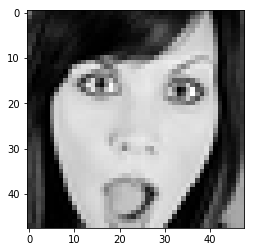

In [0]:
plt.imshow(data['pixels'].iloc[257].reshape((48, 48)), cmap='gray')

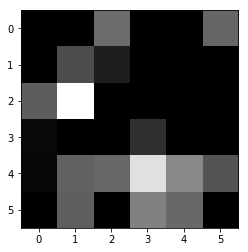

In [0]:
import matplotlib.pyplot as plt
plt.imshow(attention_features[0, :, :, 0], cmap='gray')

**Attention of angry image**

In [0]:
attention_features = view_attention_layer.predict(data['pixels'].iloc[8500].reshape((1, 48, 48, 1)))

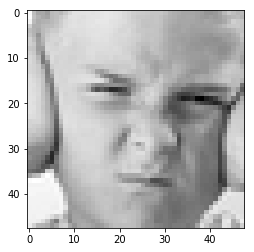

In [0]:
plt.imshow(data['pixels'].iloc[8500].reshape((48, 48)), cmap='gray')

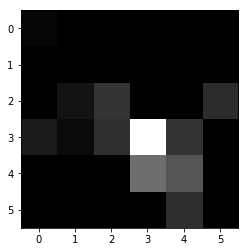

In [0]:
import matplotlib.pyplot as plt
plt.imshow(attention_features[0, :, :, 0], cmap='gray')

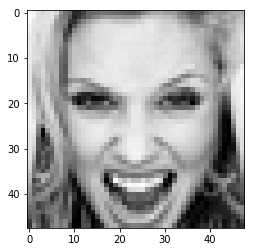

In [0]:
plt.imshow(data['pixels'].iloc[10016].reshape((48, 48)), cmap='gray')

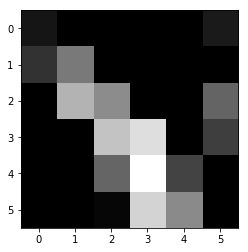

In [0]:
attention_features = view_attention_layer.predict(data['pixels'].iloc[10016].reshape((1, 48, 48, 1)))
plt.imshow(attention_features[0, :, :, 0], cmap='gray')

**Attention of happy image**

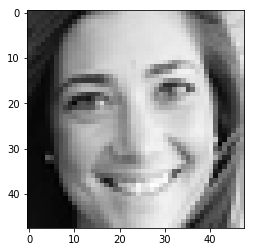

In [0]:
plt.imshow(data['pixels'].iloc[17008].reshape((48, 48)), cmap='gray')

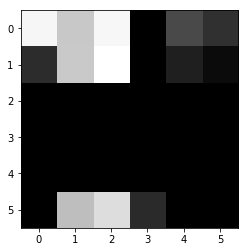

In [0]:
attention_features = view_attention_layer.predict(data['pixels'].iloc[17008].reshape((1, 48, 48, 1)))
plt.imshow(attention_features[0, :, :, 0], cmap='gray')